# Meta Ads - Creative Test

### package import

In [203]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

### seaborn graph size 조정

In [214]:
sns.set(rc={'figure.figsize':(15, 5)})

### pandas package로 csv 파일 불러오기

In [215]:
df = pd.read_csv('/Users/gwangyongkim/Downloads/1209_meta_ads.csv', header=0, index_col=None, encoding='utf-8')

columns를 상황에 따라 활용하기 편하게 설정 : "공백 제거 후 언더바로 치환", "대문자가 포함된 경우 소문자로 치환"

In [216]:
# columns에 공백이 있을 경우 under bar "_"로 치환
df.columns = df.columns.str.replace(" ", "_")
# df.columns = df.columns.str.replace("(", "_")
# df.columns = df.columns.str.replace(")", "_")

# colums에 대문자가 있을 경우, 소문자로 변환
df.columns = map(str.lower, df.columns)

# reporting_start columns를 기준으로 오름차순 정렬
df = df.sort_values(by='reporting_starts' ,ascending=True)
df.head()

,reporting_starts,reporting_ends,ad_name,campaign_name,ad_set_name,starts,attribution_setting,ad_set_budget,ad_set_budget_type,results,...,cpm,reach,frequency,link_clicks,ctr,cpc,unique_link_clicks,unique_ctr,cost_per_unique_link_click,mobile_app_installs
1070,2022.12.1,2022.12.1,img_pets_1104,dw_PH_appAD_iOS_1836MF_221104,dw_PH_appAD_iOS_(A+AC),2022.11.4,From Apple's SKAdNetwork API [Click-through at...,150,Daily,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
982,2022.12.1,2022.12.1,A_Food_1027,dw_PH_appAD_iOS_1836MF_221027,dw_PH_appAD_iOS_A_image,2022.10.27,From Apple's SKAdNetwork API [Click-through at...,Using campaign budget,0,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
983,2022.12.1,2022.12.1,img_01_NF_a,(test) dw_PH_appAD_iOS_materials type,(New Features)_1836MF_1130,2022.12.2,From Apple's SKAdNetwork API [Click-through at...,20,Daily,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
984,2022.12.1,2022.12.1,A_Pets_1027,dw_PH_appAD_iOS_1836MF_221027,dw_PH_appAD_iOS_A_image,2022.10.27,From Apple's SKAdNetwork API [Click-through at...,Using campaign budget,0,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
985,2022.12.1,2022.12.1,img_01_gaming_d,(test) dw_PH_appAD_iOS_materials type,(gaming)_1836_MF_1130,2022.12.2,From Apple's SKAdNetwork API [Click-through at...,30,Daily,NaN,...,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


### 컬럼명 모두 불러오기 (*컬럼명을 활용해서 분석할 때 바로 확인 가능해서 편함)

In [217]:
print(df.columns)

Index(['reporting_starts', 'reporting_ends', 'ad_name', 'campaign_name',
       'ad_set_name', 'starts', 'attribution_setting', 'ad_set_budget',
       'ad_set_budget_type', 'results', 'result_indicator', 'result_rate',
       'cost_per_results', 'amount_spent', 'impressions', 'cpm', 'reach',
       'frequency', 'link_clicks', 'ctr', 'cpc', 'unique_link_clicks',
       'unique_ctr', 'cost_per_unique_link_click', 'mobile_app_installs'],
      dtype='object')


### 컬럼별 통계를 확인할 수 있음

In [218]:
# count : 행갯수(헤더 제외)
# mean : 평균 값
# std : 표준편차
# min : 최소 값
# 25% 지점, 50% 지점, 75% 지점
# max : 최대 값

df.describe()

,results,result_rate,cost_per_results,amount_spent,impressions,cpm,reach,frequency,link_clicks,ctr,cpc,unique_link_clicks,unique_ctr,cost_per_unique_link_click,mobile_app_installs
count,133.000000,118.000000,133.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,205.000000,205.000000,205.000000,205.000000,1071.000000,205.000000,133.000000
mean,4.045113,0.021421,6.540406,3.062232,5492.545285,0.204757,4876.056022,0.257543,21.756098,0.100698,1.018782,21.317073,0.021203,1.030431,4.045113
std,3.673956,0.021906,6.658088,9.705535,17944.674565,0.480121,15754.506976,0.468118,27.184897,0.081768,0.966633,26.550949,0.057375,0.965935,3.673956
min,1.000000,0.001179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002421,0.145714,1.000000,0.000000,0.145714,1.000000
25%,1.000000,0.007448,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.046189,0.442000,5.000000,0.000000,0.448537,1.000000
50%,3.000000,0.015162,5.280000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.087287,0.754857,14.000000,0.000000,0.767500,3.000000
75%,6.000000,0.026724,8.300000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.132275,1.270000,29.000000,0.000000,1.296923,6.000000
max,22.000000,0.151592,49.860000,78.050000,140322.000000,2.688679,128959.000000,1.278862,171.000000,0.569260,8.870000,168.000000,0.604839,8.870000,22.000000


In [219]:
# sns.countplot(data=df, x='ad_name', hue='campaign_name')

# plt.xticks(rotation=90)

### Total Mobile App Install per day

일별 합계 지표 = df_sum

In [225]:
df_sum = df.groupby('reporting_starts').sum()
df_sum

,results,result_rate,cost_per_results,amount_spent,impressions,cpm,reach,frequency,link_clicks,ctr,cpc,unique_link_clicks,unique_ctr,cost_per_unique_link_click,mobile_app_installs
reporting_starts,,,,,,,,,,,,,,,
2022.12.1,71.0,0.222631,49.451894,284.52,485952,9.933849,415944,12.564522,391.0,1.038408,8.716249,383.0,1.181678,8.799180,71.0
2022.12.2,60.0,0.267096,68.337004,396.99,675824,29.156877,608999,33.951490,520.0,2.716289,26.340221,511.0,3.011868,26.591694,60.0
2022.12.3,53.0,0.329119,121.933571,444.17,631379,29.817247,550763,34.805636,607.0,2.806027,31.296607,594.0,3.168722,31.561696,53.0
2022.12.4,65.0,0.258029,162.399202,443.78,713871,24.895574,626096,35.167565,588.0,2.692910,20.295768,573.0,3.030767,20.686722,65.0
2022.12.5,70.0,0.307823,82.972639,432.26,768702,23.517489,667850,35.032090,652.0,2.066522,34.378246,643.0,2.381326,34.453603,70.0
2022.12.6,59.0,0.246142,72.664167,387.95,879790,22.475208,783687,32.580127,556.0,1.690224,24.951288,544.0,1.850139,25.315460,59.0
2022.12.7,60.0,0.296568,104.216107,355.09,876463,28.407085,801072,34.654763,487.0,2.261867,25.736556,483.0,2.490414,25.776425,60.0
2022.12.8,62.0,0.239426,151.589405,407.05,669589,30.748717,599610,34.959874,501.0,3.316441,23.682165,482.0,3.401553,24.434007,62.0
2022.12.9,38.0,0.360859,56.310000,127.84,180946,20.342319,168235,22.112360,158.0,2.054392,13.453228,157.0,2.192201,13.619617,38.0


일별 평균 지표 = df_mean

In [226]:
df_mean = df.groupby('reporting_starts').mean()
df_mean

,results,result_rate,cost_per_results,amount_spent,impressions,cpm,reach,frequency,link_clicks,ctr,cpc,unique_link_clicks,unique_ctr,cost_per_unique_link_click,mobile_app_installs
reporting_starts,,,,,,,,,,,,,,,
2022.12.1,5.461538,0.024737,3.803992,2.390924,4083.630252,0.083478,3495.327731,0.105584,39.100000,0.103841,0.871625,38.300000,0.009930,0.879918,5.461538
2022.12.2,4.285714,0.024281,4.881215,3.336050,5679.193277,0.245016,5117.638655,0.285307,19.259259,0.100603,0.975564,18.925926,0.025310,0.984878,4.285714
2022.12.3,3.785714,0.023508,8.709541,3.732521,5305.705882,0.250565,4628.260504,0.292484,22.481481,0.103927,1.159134,22.000000,0.026628,1.168952,3.785714
2022.12.4,3.421053,0.013580,8.547326,3.729244,5998.915966,0.209207,5261.310924,0.295526,22.615385,0.103573,0.780606,22.038462,0.025469,0.795643,3.421053
2022.12.5,4.117647,0.018107,4.880743,3.632437,6459.680672,0.197626,5612.184874,0.294387,25.076923,0.079482,1.322240,24.730769,0.020011,1.325139,4.117647
2022.12.6,4.538462,0.020512,5.589551,3.260084,7393.193277,0.188867,6585.605042,0.273783,24.173913,0.073488,1.084839,23.652174,0.015547,1.100672,4.538462
2022.12.7,4.615385,0.024714,8.016624,2.983950,7365.235294,0.238715,6731.697479,0.291216,18.730769,0.086995,0.989868,18.576923,0.020928,0.991401,4.615385
2022.12.8,4.133333,0.017102,10.105960,3.420588,5626.798319,0.258393,5038.739496,0.293780,19.269231,0.127555,0.910853,18.538462,0.028584,0.939770,4.133333
2022.12.9,2.533333,0.036086,3.754000,1.074286,1520.554622,0.170944,1413.739496,0.185818,11.285714,0.146742,0.960945,11.214286,0.018422,0.972830,2.533333


### mobile_app_install & CPI

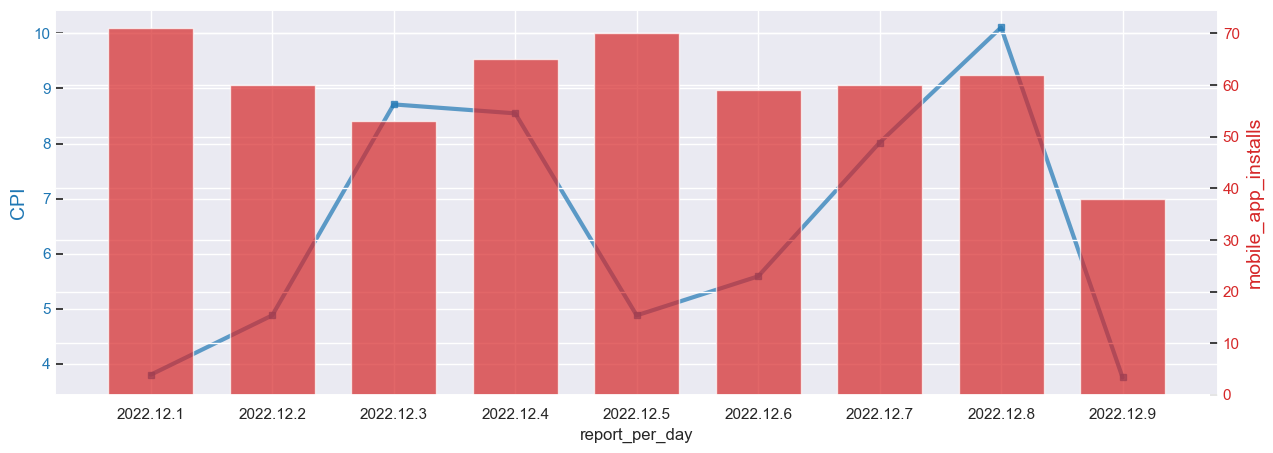

In [324]:
fig, ax1 = plt.subplots()

color_1 = 'tab:blue'
color_2 = 'tab:red'

# CPI는 일 평균 데이터
ax1.plot(df_mean.index, df_mean.cost_per_results, '-s', markersize=5, linewidth=3, alpha=0.7, color=color_1)
# ax1.set_ylim(0, 18)
ax1.set_xlabel('report_per_day')
ax1.set_ylabel('CPI', fontsize=14, color=color_1)
ax1.tick_params(axis='y', direction='in', labelcolor=color_1)

# mobile_app_install은 일 총계 데이터
ax2 = ax1.twinx()
ax2.bar(df_sum.index, df_sum.mobile_app_installs, alpha=0.7, width=0.7, color=color_2)
# ax2.set_ylim(0, 18)
ax2.set_ylabel('mobile_app_installs', fontsize=14, color=color_2)
ax2.tick_params(axis='y', direction='in', labelcolor=color_2)

### Reach & CTR (per day)

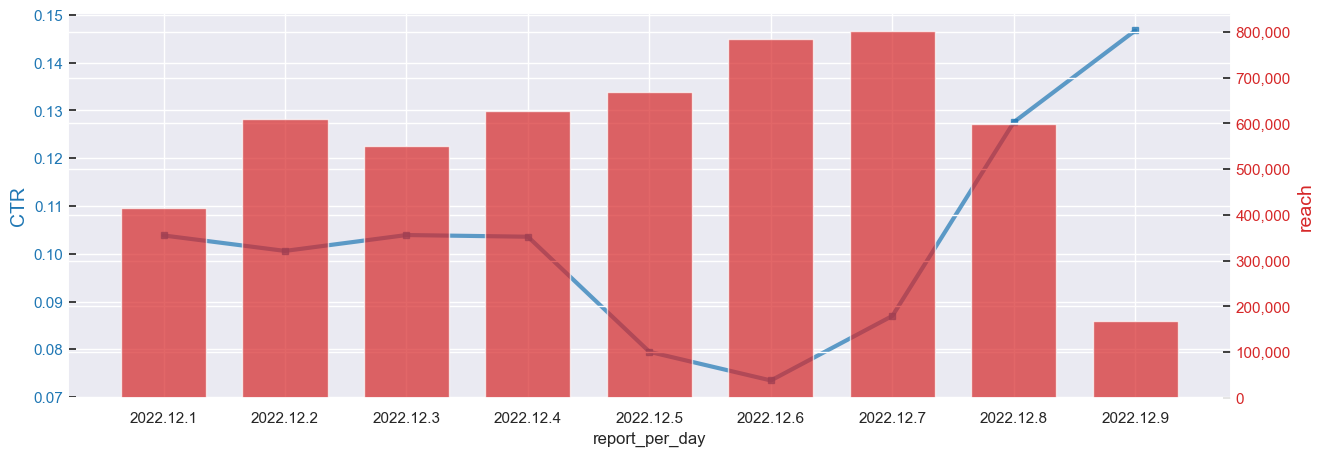

In [328]:
fig, ax1 = plt.subplots()

color_1 = 'tab:blue'
color_2 = 'tab:red'

# CTR 일 평균 데이터
ax1.plot(df_mean.index, df_mean.ctr, '-s', markersize=5, linewidth=3, alpha=0.7, color=color_1)
# ax1.set_ylim(0, 18)
ax1.set_xlabel('report_per_day')
ax1.set_ylabel('CTR', fontsize=14, color=color_1)
ax1.tick_params(axis='y', direction='in', labelcolor=color_1)

# reach는 일 총계 데이터
ax2 = ax1.twinx()
ax2.bar(df_sum.index, df_sum.reach, alpha=0.7, width=0.7, color=color_2)
# ax2.set_ylim(0, 18)
ax2.set_ylabel('reach', fontsize=14, color=color_2)
ax2.tick_params(axis='y', direction='in', labelcolor=color_2)

import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax2.yaxis.set_major_formatter(y_format)

In [162]:
# dfcampaign_install = pd.pivot_table(df,                                # 피벗할 데이터프레임
#                     index = 'reporting_starts',         # 행 위치에 들어갈 열
#                     columns = 'campaign_name',                # 열 위치에 들어갈 열
#                     values = 'mobile_app_installs',     # 데이터로 사용할 열
#                     aggfunc = 'sum')                   # 데이터 집계함수

# dfcampaign_install

In [163]:
# dfcampaign_install2=dfcampaign_install.sum(axis=1)
# dfcampaign_install2

In [165]:
# print(dfcampaign_install.columns)

In [164]:
# sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='(test) dw_KR_traffic_1934MF_221108')
# sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_AOS_1836MF_221027')
# sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_AOS_1836MF_221115')
# sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_iOS_1836MF_221027')
# sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_iOS_1836MF_221104')
# sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_iOS_1836MF_221115_a+ac')


#sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='(test) dw_PH_appAD_AOS_materials type')
#sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='(test) dw_PH_appAD_iOS_materials type')
#sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_AOS_1836MF_221121')
#sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_iOS_1836MF_221116')
#sns.lineplot(data=dfcampaign_install, x='reporting_starts', y='dw_PH_appAD_iOS_1836MF_221121')

#plt.xlabel('date')
#plt.ylabel('mobile app install')
# plt.legend(loc='upper left')

<AxesSubplot:xlabel='reporting_starts', ylabel='mobile_app_installs'>

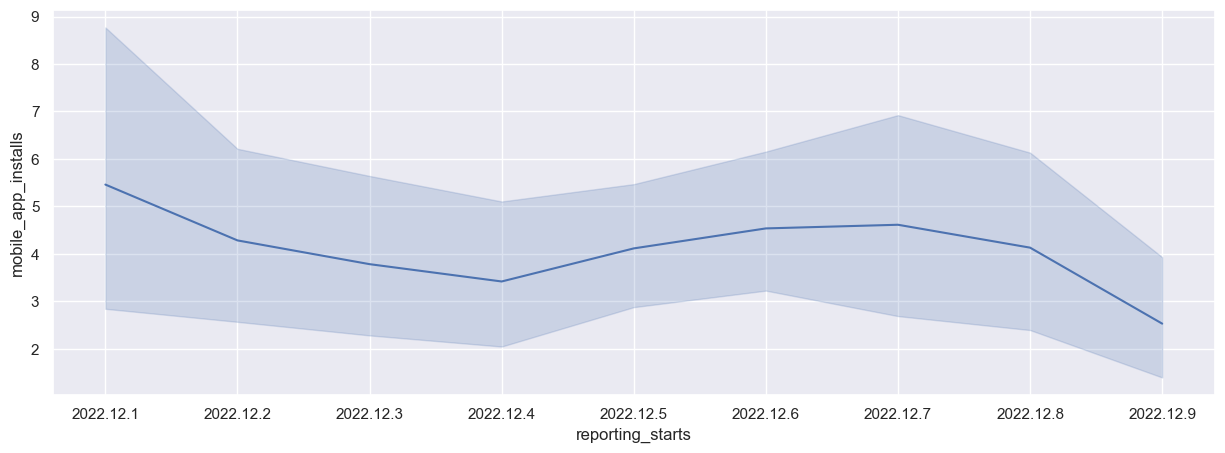

In [80]:
sns.lineplot(data=df, x='reporting_starts', y='mobile_app_installs')

In [83]:
# sns.lineplot(data=df, x='reporting_starts', y='cost_per_results', hue='cpc')

In [88]:
# df['mobile_app_installs'].cumsum().plot()

In [64]:
df_size = df.pivot_table(index='link_clicks' ,columns='ad_name' ,aggfunc='size')
df_size.head()

ad_name,img_01_Fitness_a,img_01_NF_a,img_01_NF_b,img_01_NF_c,img_01_Travel,img_01_gaming_a,img_01_gaming_c,img_01_gaming_d,img_01_pets_a,img_01_pets_b,...,img_01_pets_e,img_02_Travel,img_03_Fitness,img_03_foodie_a,img_03_foodie_b,img_xmas_01,img_xmas_02,img_xmas_06,img_xmas_08,img_xmas_09
link_clicks,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,1.0,1.0,2.0,NaN,5.0,NaN,NaN,1.0,2.0,...,1.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,1.0,2.0
2.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
3.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN


ValueError: Unknown format code 'd' for object of type 'float'

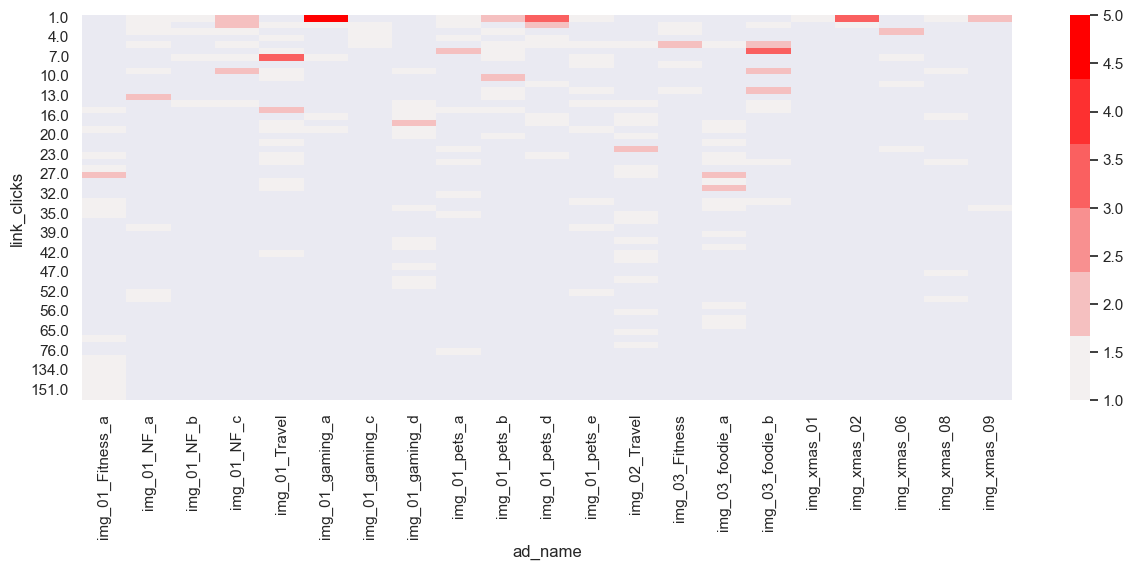

In [69]:
sns.heatmap(df_size, annot=True, fmt='d', cmap=sns.light_palette('red'))

In [56]:
df_01pets = df[df['ad_name'] == 'img_01_pets_e']
df_01pets.head()

,reporting_starts,reporting_ends,ad_name,campaign_name,ad_set_name,starts,attribution_setting,ad_set_budget,ad_set_budget_type,results,...,cpm,reach,frequency,link_clicks,ctr,cpc,unique_link_clicks,unique_ctr,cost_per_unique_link_click,mobile_app_installs
997,2022.12.1,2022.12.1,img_01_pets_e,(test) dw_PH_appAD_AOS_materials type,(Pets)_1836MF_1130,2022.12.2,1-day click,30,Daily,NaN,...,0.000000,0,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
977,2022.12.1,2022.12.1,img_01_pets_e,(test) dw_PH_appAD_iOS_materials type,(Pets)_1836MF_1130,2022.12.2,From Apple's SKAdNetwork API [Click-through at...,40,Daily,NaN,...,0.000000,0,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
878,2022.12.2,2022.12.2,img_01_pets_e,(test) dw_PH_appAD_AOS_materials type,(Pets)_1836MF_1130,2022.12.2,1-day click,30,Daily,1.0,...,1.487816,3791,1.125824,7.0,0.164011,0.907143,7.0,0.184648,0.907143,1.0
858,2022.12.2,2022.12.2,img_01_pets_e,(test) dw_PH_appAD_iOS_materials type,(Pets)_1836MF_1130,2022.12.2,From Apple's SKAdNetwork API [Click-through at...,40,Daily,NaN,...,0.595060,16112,1.080561,33.0,0.189546,0.313939,32.0,0.198610,0.323750,NaN
759,2022.12.3,2022.12.3,img_01_pets_e,(test) dw_PH_appAD_AOS_materials type,(Pets)_1836MF_1130,2022.12.2,1-day click,30,Daily,NaN,...,1.381566,4398,1.112551,1.0,0.020437,6.760000,1.0,0.022738,6.760000,NaN


<AxesSubplot:xlabel='reporting_starts', ylabel='count'>

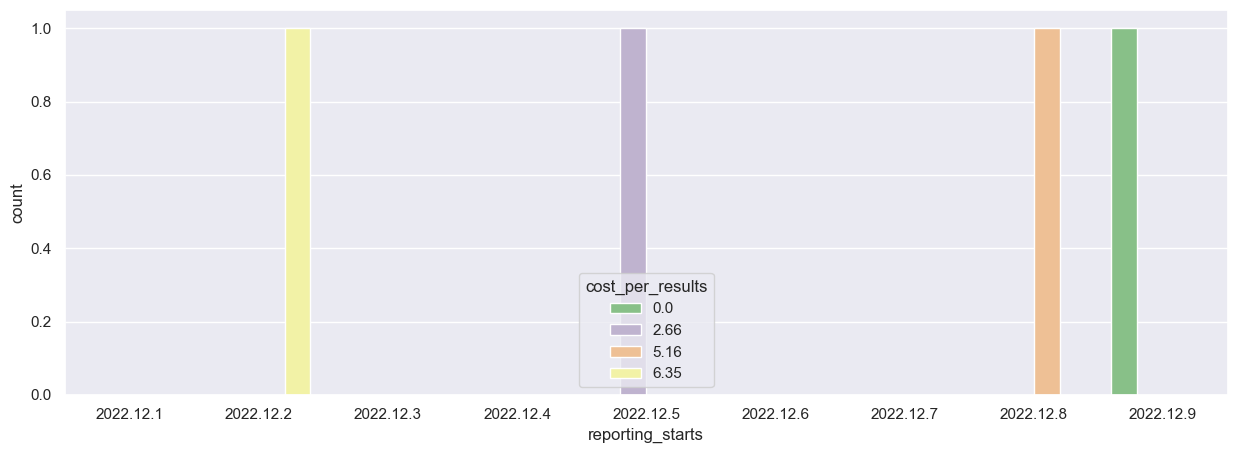

In [57]:
sns.countplot(data=df_01pets, x='reporting_starts', hue='cost_per_results', palette='Accent')

# plt.xticks(rotation=90)

### CPI 분포 그래프

<AxesSubplot:xlabel='cost_per_results', ylabel='Count'>

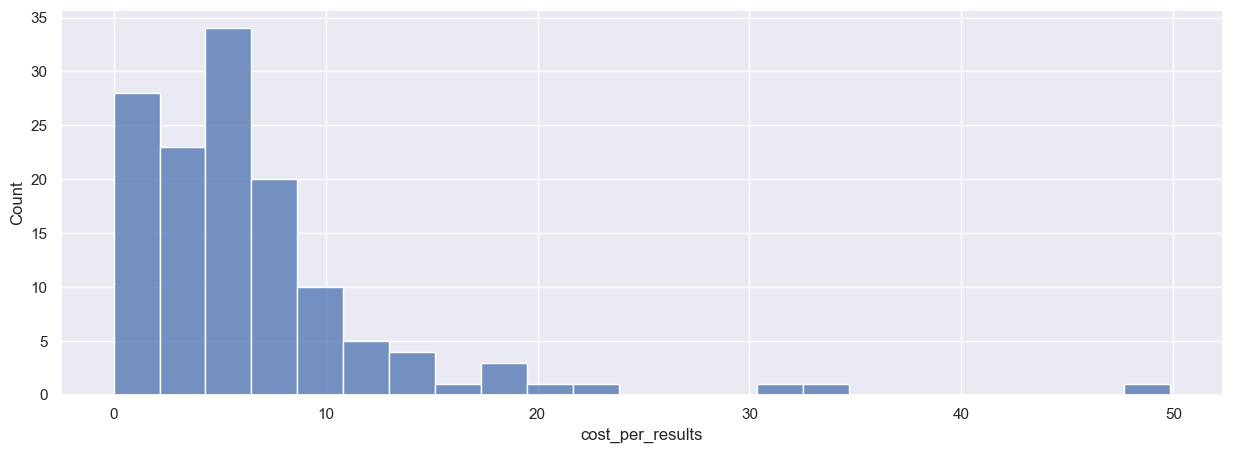

In [58]:
# sns.histplot(df['cost_per_results'])
sns.histplot(data=df, x="cost_per_results")

In [76]:
# country 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
# is_img_01_pets_e = df['ad_name'] == 'img_01_pets_e'

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
# img_01_pets_e = df['img_01_pets_e']

# 결과를 출력합니다.
# img_01_pets_e

In [77]:
sns.countplot(data=df, x='Reporting ends', hue='Mobile app installs')

plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [10, 5]
plt.legend(loc='upper right')

ValueError: Could not interpret input 'Reporting ends'

In [78]:
df['Mobile app installs'].value_counts()
# df['age'].value_counts().sort_values()
# df['pclass'].value_counts()

KeyError: 'Mobile app installs'

In [79]:
df['Mobile app installs'].value_counts().sort_values()

KeyError: 'Mobile app installs'

In [80]:
print(df['Mobile app installs'].sum(axis=0, skipna=False))
# print(df.sum(axis=0,skipna=False))

KeyError: 'Mobile app installs'